# Thresholding


## Introduction to thresholds



Thresholding is a type of Image Segmentation in which you segment the image into the foreground and background. In the foreground, you have an object of interest, and in the background, you have everything except an object of interest. Separating the regions corresponding to the object of interest and background is useful in many computer vision applications. Binary masks for an image is generated using the thresholding process. 

Thresholding often provides an easy and convenient way to perform this segmentation based on the different intensities or colors in the foreground and background regions of an image.  If an image can be segmented correctly or not, is determined by looking at the Image's intensity histogram. Here, we'll only consider a grayscale bimodal histogram, but the color extension is trivial.




### Example



<image>
<center>



<p>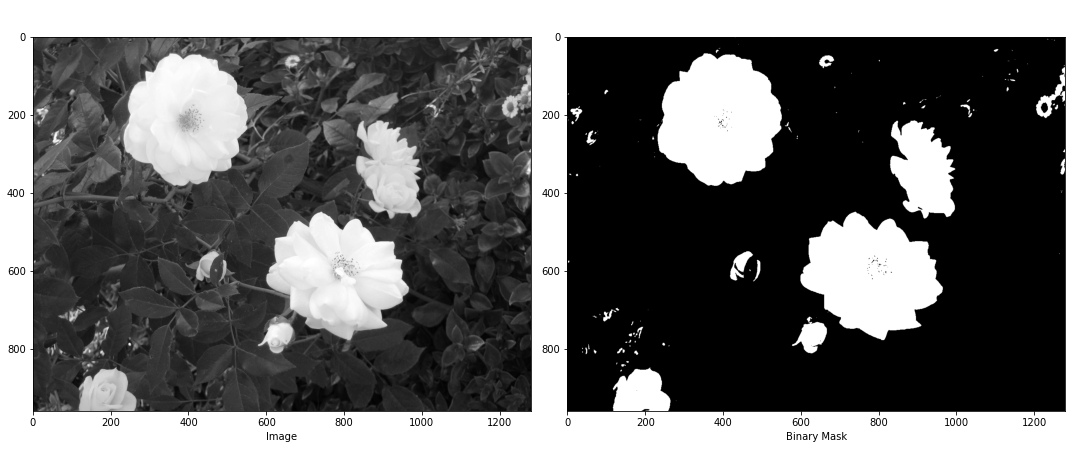</p>

<Figcaption>Figure:1 Image Thresholding</Figcaption>

</center>
</image>





As we have already seen the histogram of the image on the left-hand side. It has a bimodal histogram. If you want to extract only the flower part and remove everything, then a simple approach would be defining a value called the threshold. 

Let's say the value of threshold $T = 150,$ then Each pixel in an image is compared with that threshold $150$ in a single pass. 



$$
f(i,j)= \begin{cases}
    \text{white},& \text{if f(x,y)}\geq T\\
    \text{black},              & \text{otherwise}
\end{cases}
$$

If pixel value is greater or equals to the threshold value it is made white. In other condition it it set to black.

It finally gives a binary Mask of an Image. This process is called binarization.




##### Note


- Multiple thresholds can be defined in more advanced implementations.
- For color images, it is possible to set different thresholds for each color channel.


## Types of thresholding

There are 3 types of thresholding techniques. However, we will cover the following only.
1. Global Thresholding

2. Local Thresholding



This section will cover  two types of thresholding with examples.



<image>
<center>



<p>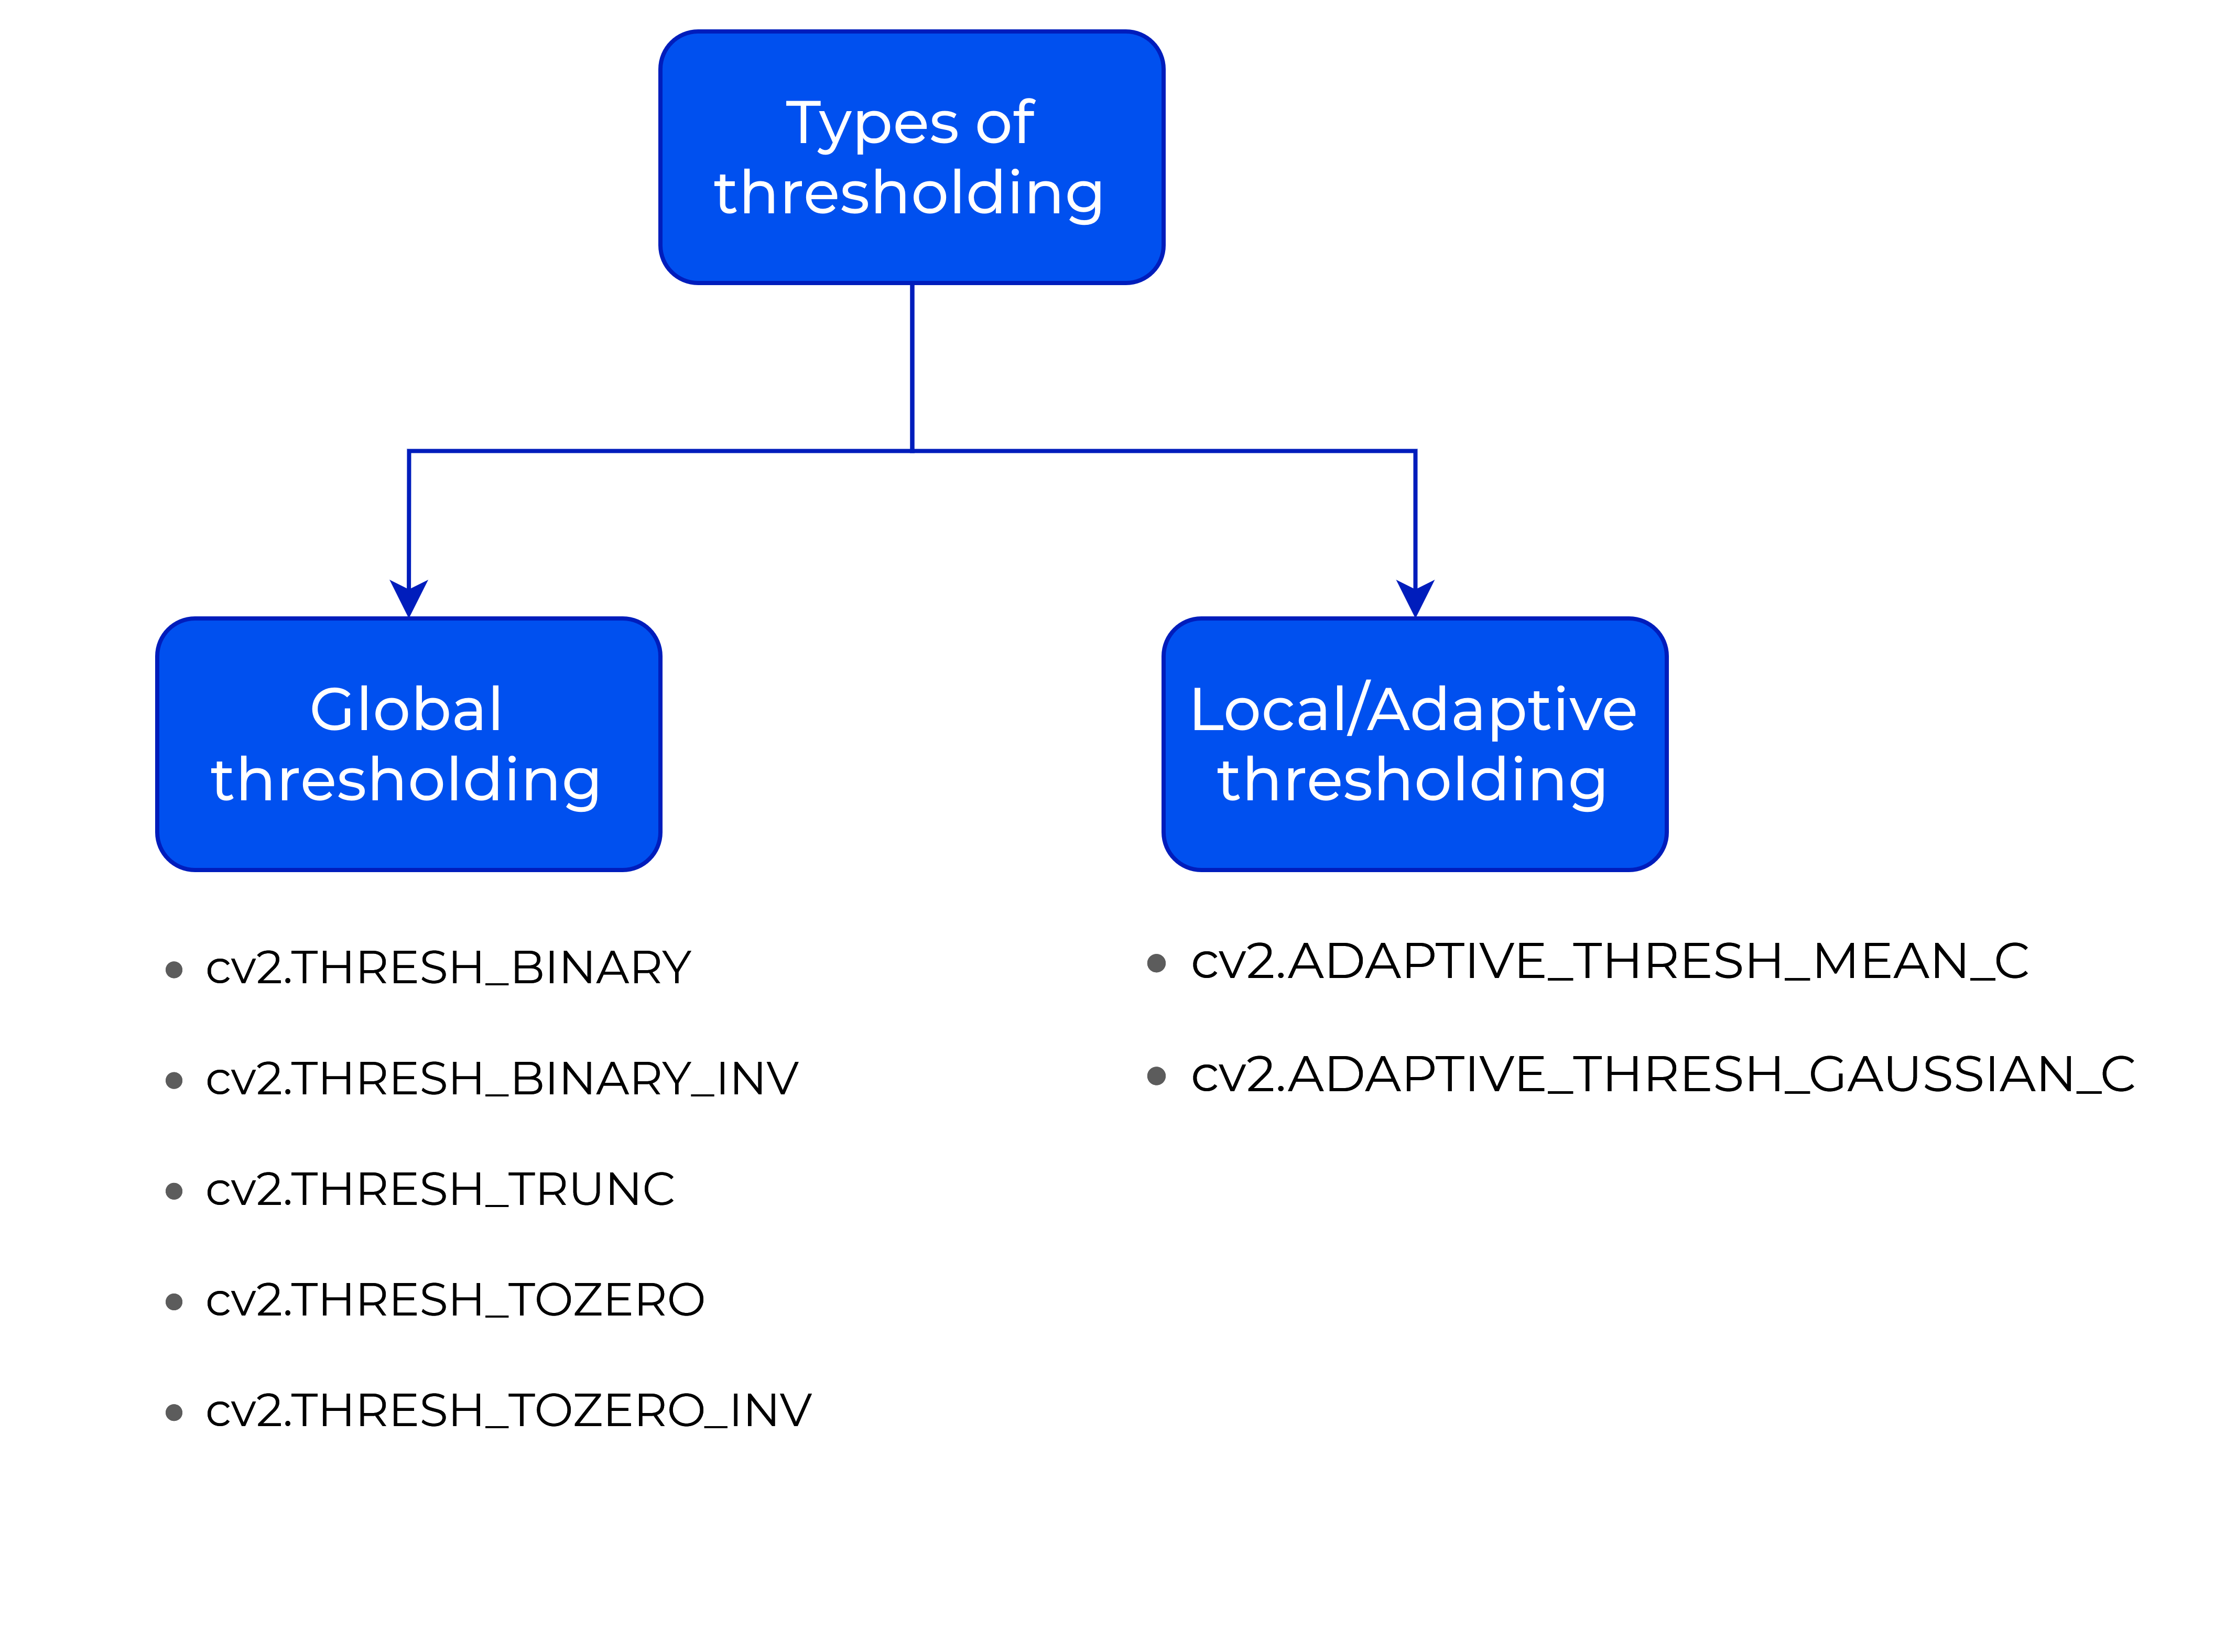</p>

<Figcaption>Figure:2 Types of Thresholding</Figcaption>

</center>
</image>



### Global Thresholding


If the image has a bimodal histogram, you can segment an image into the foreground and background using one threshold value. This process is called global thresholding. 

How to determine the value of the global threshold? The simple answer is by looking histogram of an image; you can determine the global threshold value.




<image>
<center>


<p>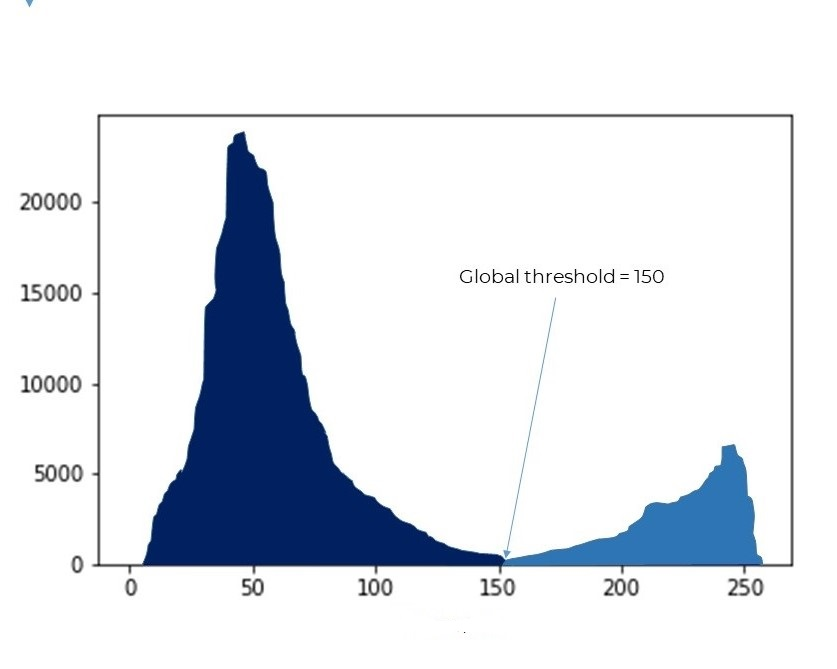</p>
<Figcaption>Figure :3 Bimodal Histogram </Figcaption>
</center>
</image>




`Figure: 3` is a bimodal histogram of an image. The best way to extract the foreground object from the background is to choose a value that separates these two modes. In our case, it is $150$. Therefore the value of the global threshold is $150.$



Let's see an example of the implementation of different varieties of global thresholding.


__Example__


In [2]:
# Importing OpenCV and others Libraries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from IPython.display import display, Image
from sklearn.decomposition import FastICA
from IPython.display import display
from PIL import Image as PILImage

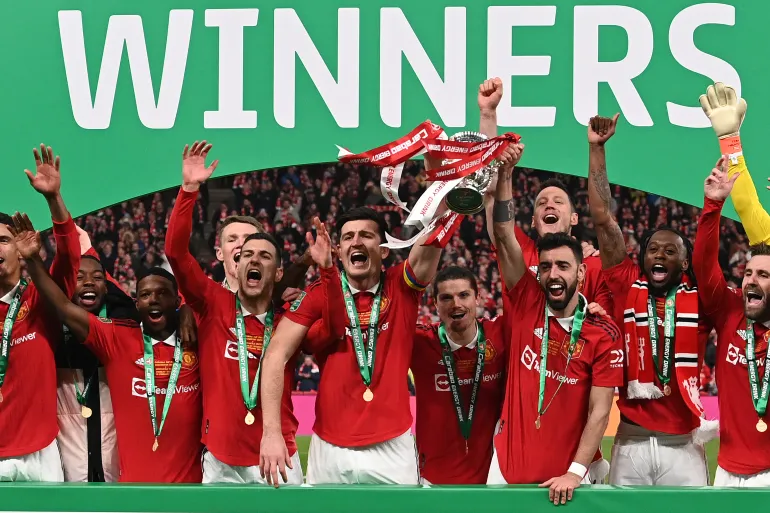

In [3]:
# Reading the image using OpenCV
bimodal_image = cv2.imread('manchester_united.jpg',0)

# Checking if the image was read successfully
if bimodal_image is None:
    print("Image not found or invalid format")
else:
    # Display the image using IPython.display
    display(Image(filename='manchester_united.jpg'))

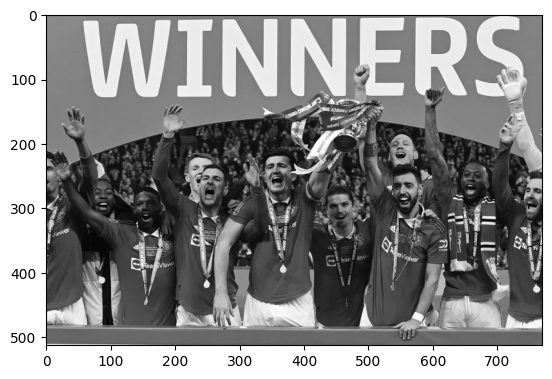

In [4]:
plt.imshow(bimodal_image,cmap='gray')
#This is used to display an image using the imshow function from the Matplotlib library.
#bimodal_image: This variable likely contains the image data that you want to display. It's assumed to be a 2D NumPy array representing an image. 
#The name "bimodal_image" suggests that the image might be a grayscale image with two distinct intensity modes, often seen in image processing.

_Plotting histogram to see if it is bimodal or not._


In [5]:
minimum_value = 0
maximum_value = 256

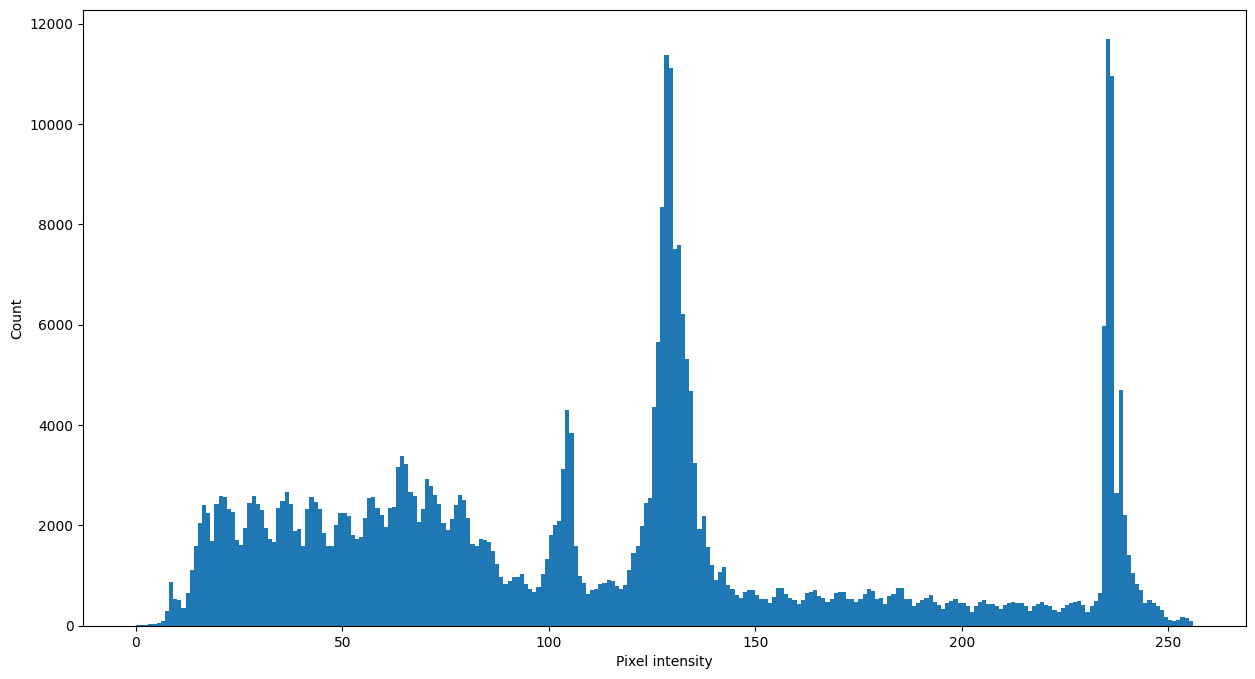

In [6]:
plt.figure(figsize=(15,8))
plt.hist(bimodal_image.ravel(),maximum_value,[minimum_value,maximum_value])
plt.xlabel("Pixel intensity")
plt.ylabel("Count")
plt.show()

It is bimodal histogram. 


In [7]:
#Using global thresholding techniques.
global_threshold = 180

Implement 5 types of global thresholding technique.

<!-- 1.	__cv2.THRESH_BINARY:__ Creates a binary image where a value below the threshold is 0, and the above threshold is 255.
2.	__cv2.THRESH_BINARY_INV:__ It is inverse of THRESH_BINARY value below threshold = 255, value above threshold =0
3.	__cv2.THRESH_TRUNC:__ Values smaller than the threshold value are unchanged, but any value larger than the threshold is set to a defined threshold value.
4.	__cv2.THRESH_TOZERO:__ Pixel values lower then the threshold value are set to the 0, and value above the threshold is unchanged.
5.	__cv2.THRESH_TOZERO_INV:__ Pixel values smaller than the threshold value are fixed, and the value above a threshold is set to 0. -->





In [8]:
ret,THRESH_BINARY       = cv2.threshold(bimodal_image, global_threshold, maximum_value, cv2.THRESH_BINARY)
ret,THRESH_BINARY_INV   = cv2.threshold(bimodal_image, global_threshold, maximum_value, cv2.THRESH_BINARY_INV)
ret,THRESH_TRUNC        = cv2.threshold(bimodal_image, global_threshold, maximum_value, cv2.THRESH_TRUNC)
ret,THRESH_TOZERO       = cv2.threshold(bimodal_image, global_threshold, maximum_value, cv2.THRESH_TOZERO)
ret,THRESH_TOZERO_INV   = cv2.threshold(bimodal_image, global_threshold, maximum_value, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','THRESH_BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV'] 
images = [bimodal_image, THRESH_BINARY, THRESH_BINARY_INV, THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INV] 

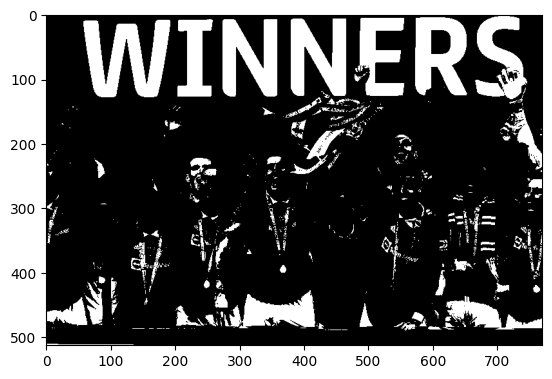

In [9]:
plt.imshow(THRESH_BINARY,cmap='gray')

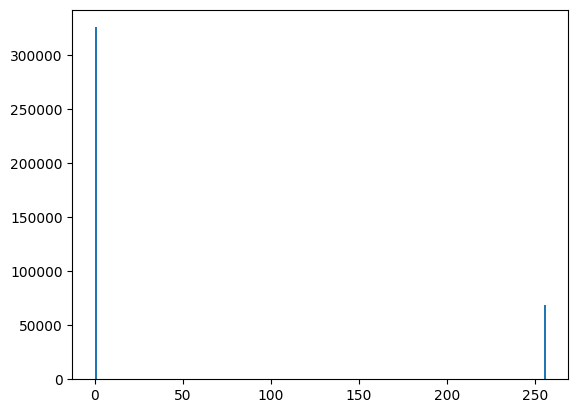

In [10]:
plt.hist(THRESH_BINARY.ravel(),maximum_value,[minimum_value,maximum_value])
plt.show()

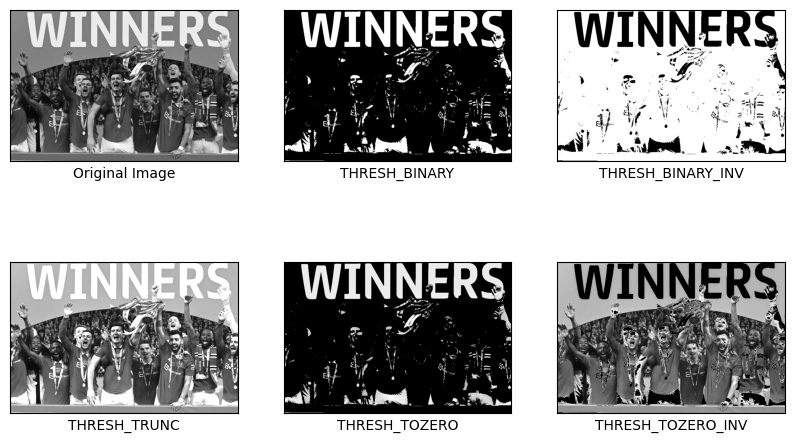

In [11]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray') # plot images in list
    plt.xlabel(titles[i])
    plt.xticks([]),plt.yticks([])
# plt.savefig("globalthreshold.PNG")
plt.show()

Despite the apparent ease of the thresholding process , given the wide range of circumstances and environments which are unique to each image, it is actually a complex procedure.


Let's now see the pixel values after thresholding by just printing and showing the value.


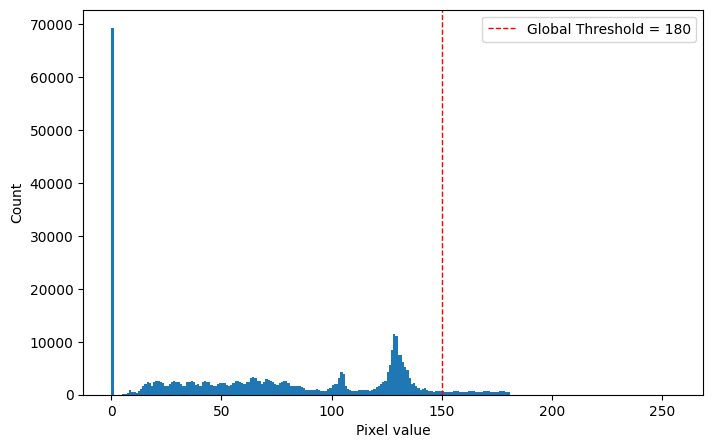

In [12]:
# images = [bimodal_image, THRESH_BINARY, THRESH_BINARY_INV, THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INV] 
plt.figure(figsize=(8,5))
plt.hist(THRESH_TOZERO_INV.ravel(),maximum_value,[minimum_value,maximum_value])
plt.axvline(x=150, color='r', linestyle='dashed', linewidth=1,label="Global Threshold" + " = " + str(global_threshold))
plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.legend()
plt.show()

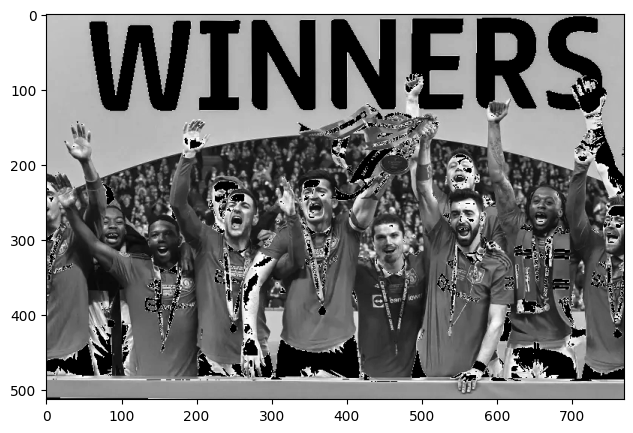

In [13]:
plt.figure(figsize=(8,5))
plt.imshow(THRESH_TOZERO_INV, cmap='gray')
plt.show()

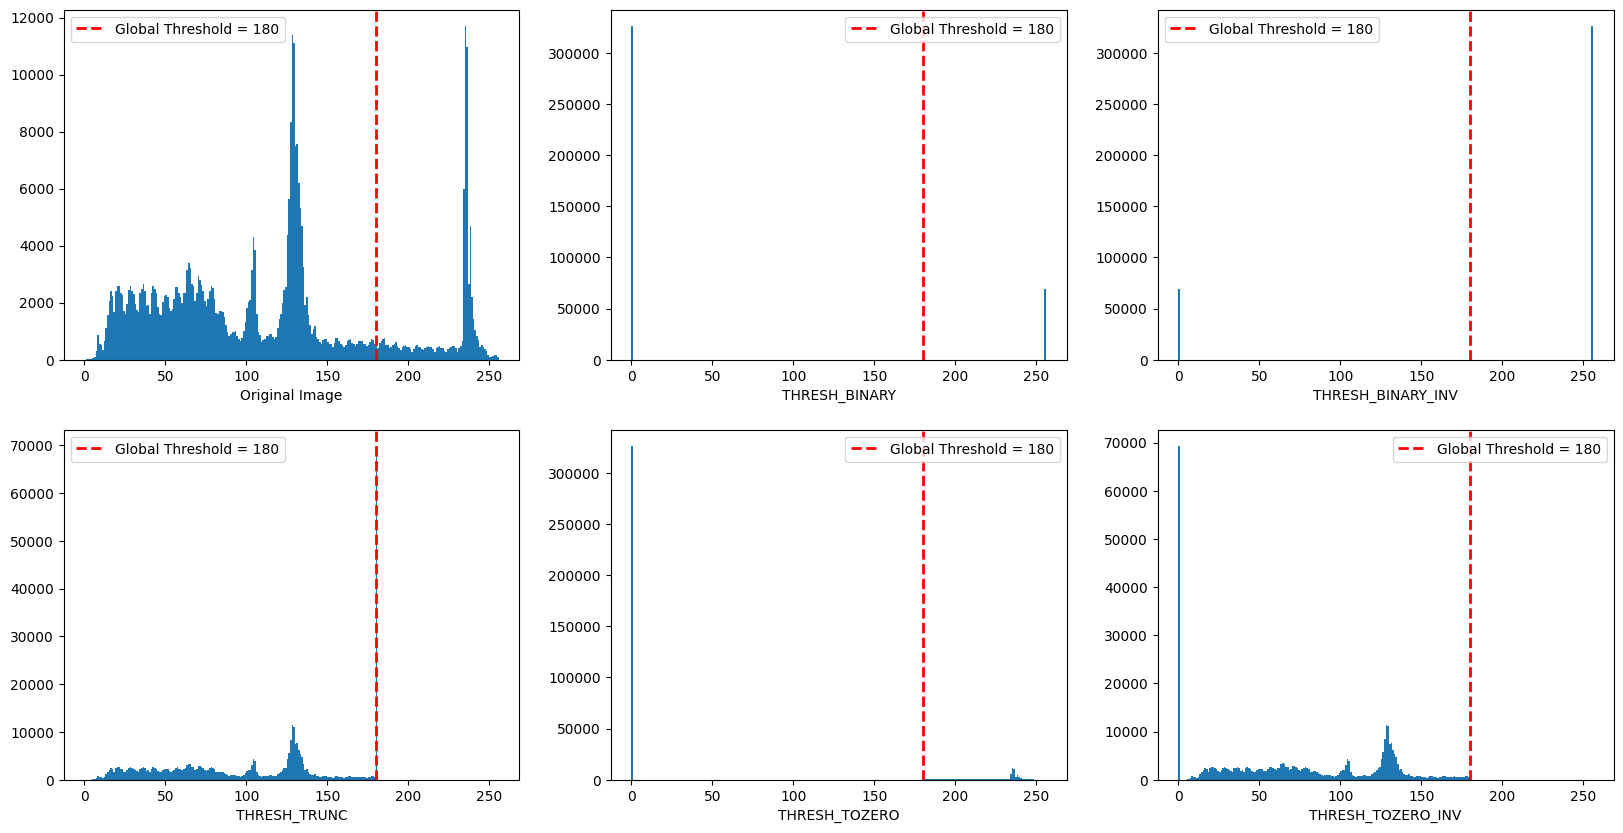

In [14]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(images[i].ravel(),maximum_value,[minimum_value,maximum_value])
    plt.axvline(x=global_threshold, color='r', linestyle='dashed', linewidth=2,\
                label="Global Threshold" + " = " + str(global_threshold))
    plt.xlabel(titles[i])
    plt.xticks(),plt.yticks() 
    plt.legend()
plt.show()
plt.close()

#### Simple Thresholding another Example


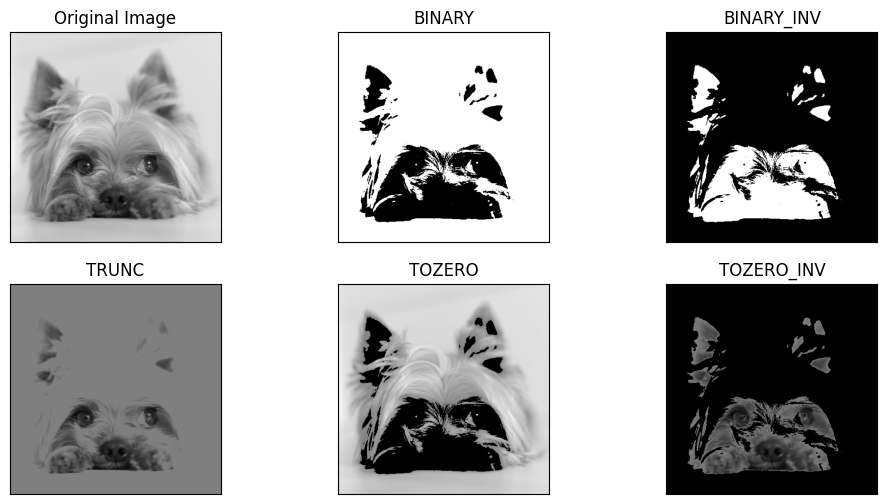

In [15]:
# Loading the grayscale image
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
assert img is not None, "File could not be read, check with os.path.exists()"

# Apply different thresholding methods
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# Define titles and images for display
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# Display the results using Matplotlib
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

#### Optimal Thresholding


In the global threshold, we choose a value that separates two modes(middle). Is it always optimal? 
* No, it is not always optimal.


#### Otsu’s Binarization/thresholding


In OTSU binarization, a threshold value for a bimodal image is calculated automatically from the image histogram. (Binarization won't be correct for pictures which are not bimodal.)



The method is optimal because it maximizes the between-class variance. Between-class variance is a well known measure in discriminant analysis. 

The basic idea is that properly thresholded classes should be distinct with respect to the intensity values of their pixels and, conversely, that a threshold
giving the best separation between classes in terms of their intensity values would be the best (optimum) threshold.




<image>
<center>



<p>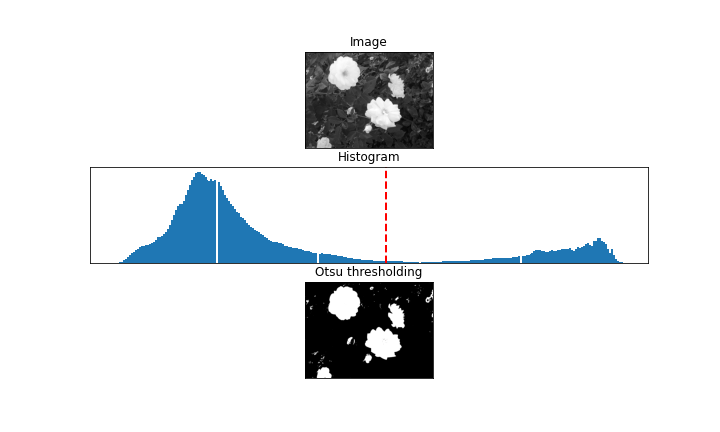</p>

<Figcaption>Figure:6 OTSU thresholding </Figcaption>

</center>
</image>


Here comes the binarisation of the Otsu. This algorithm allows us to get the correct threshold value to choose between two histogram mode quickly and automatically, so you can apply the thresholding in an optimal way.


In [16]:
# Reading the image using OpenCV
img = cv2.imread('manchester_united.jpg', 0)

Plot histogram


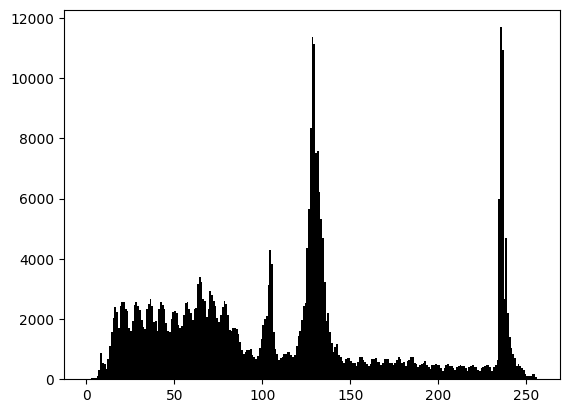

In [17]:
plt.hist(img.ravel(),maximum_value,[minimum_value,maximum_value],color='black')
plt.show()

In [18]:
ret, otsu_bin = cv2.threshold(img, minimum_value, maximum_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, otsu_binverse = cv2.threshold(img, minimum_value, maximum_value, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
ret, otsu_tozero = cv2.threshold(img, minimum_value, maximum_value, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
ret, otsu_tozeroinv = cv2.threshold(img, minimum_value, maximum_value, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, otsu_totrunc = cv2.threshold(img, minimum_value, maximum_value, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )

output = [img, otsu_bin, otsu_binverse, otsu_tozero, otsu_tozeroinv, otsu_totrunc]

titles = ['Original', 'THRESH_BINARY', 'THRESH_BINARY_INV',
            'THRESH_TOZERO', 'THRESH_TOZERO_INV', 'THRESH_TRUNC']


Let's Plot all those Images created using OTSU binarization.


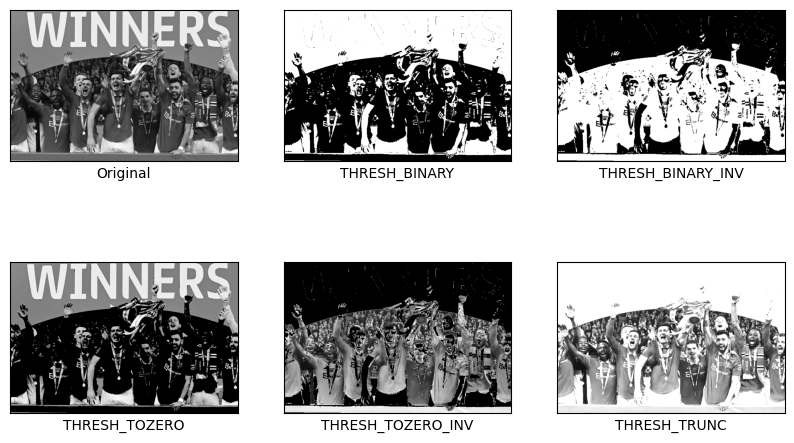

In [19]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.xlabel(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()  

__Let's visualize the working of OTSU thresholding in one example.__


112.0


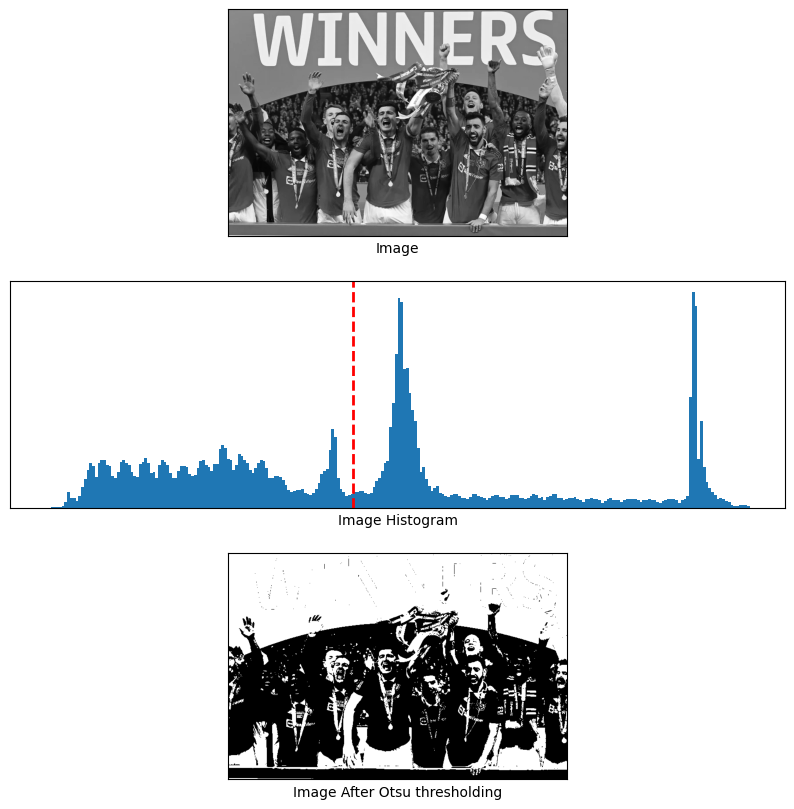

In [20]:
ret, imgf = cv2.threshold(img, minimum_value, maximum_value, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.subplot(3,1,1), plt.imshow(img,cmap = 'gray')
plt.xlabel('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2), plt.hist(img.ravel(),maximum_value,[minimum_value,maximum_value])
plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2, label='Global threshold = ' + str(ret))

plt.xlabel('Image Histogram'), plt.xticks([]), plt.yticks([])
print(ret)
plt.subplot(3,1,3), plt.imshow(imgf,cmap = 'gray')
plt.xlabel('Image After Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.savefig("OTSU.PNG")
plt.show()

#### Optimal Thresholding another example

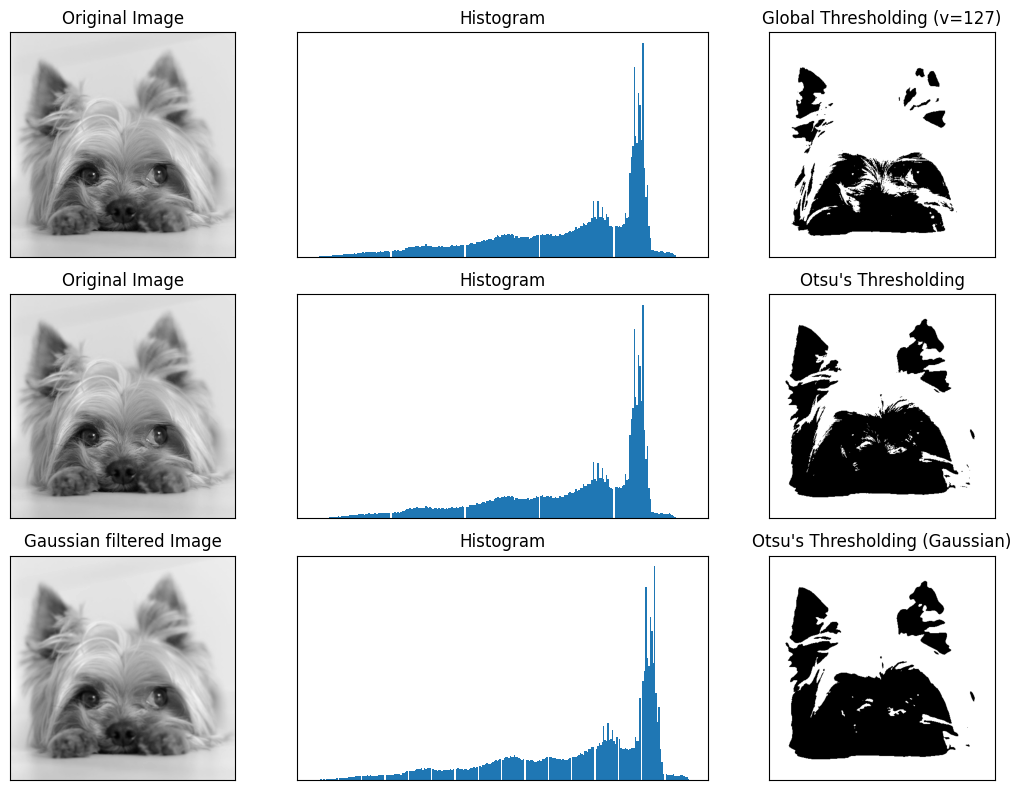

In [21]:
import cv2 as cv

# Load the grayscale image
img = cv.imread('image.jpg', cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
assert img is not None, "File could not be read, check with os.path.exists()"

# Global thresholding
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Ploting the images and their histograms (excluding adaptive thresholding)
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding (Gaussian)"]

plt.figure(figsize=(12, 8))
for i in range(3):
    plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 2), plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 3), plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2]), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


### Local Adaptive Thresholding


__Intuition__




Different Images have different lightning conditions and exposures. Using a global threshold will not always work in that case. Therefore local adaptive thresholding is used.

In this method Image is divided into sub-images and you obtain threshold for each sub-image. 

* It gives us better results for images with varying illumination or uneven lighting and exposure.


## How It Works


<image>
<center>


<p>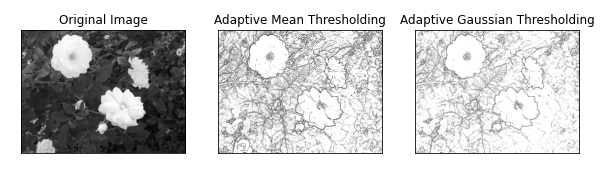</p>
<Figcaption>Figure:4 Local/Adaptive thresholding </Figcaption>
</center>
</image>


Adaptive thresholding typically takes a grayscale or color image as input and outputs a binary image representing the segmentation.

For each pixel in the image threshold value, it calculated.
If the pixel value is below the threshold, then it is set to the background value; otherwise, it assumes the foreground value.


<!-- 
<image>
<center>


<p>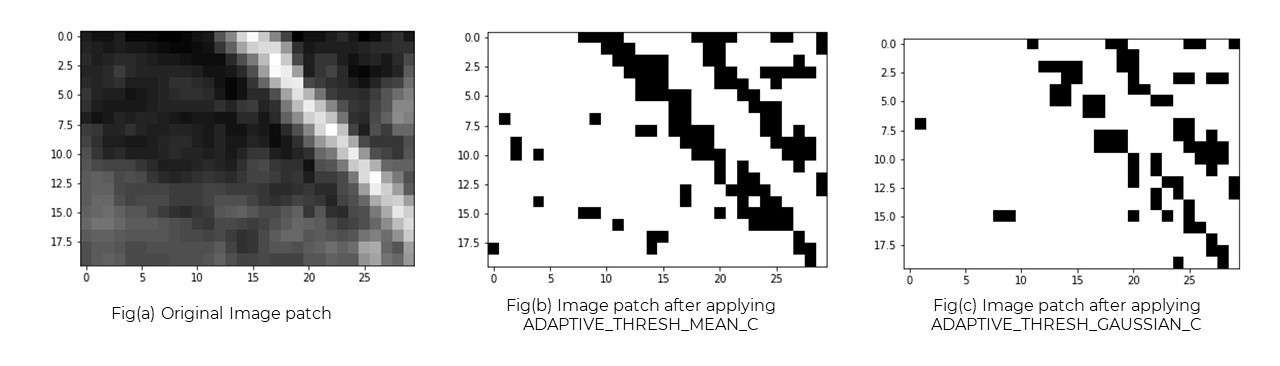</p>
<Figcaption>Figure:5 Local/Adaptive thresholding Comparison </Figcaption>
</center>
</image>
In the above figure, fig(a) shows the original image patch. fig(b) and fig(c) represent local adaptive thresholding using ADAPTIVE_THRESH_MEAN_C, and ADAPTIVE_THRESH_GAUSSIAN_C respectively.  -->


_The size of the neighborhood has to be large enough to cover sufficient foreground and background pixels, otherwise a poor threshold is chosen. On the other hand, choosing regions which are too large can violate the assumption of approximately uniform illumination._


In opencv `cv2.ADAPTIVE_THRESH_MEAN_C :` and  `cv2.ADAPTIVE_THRESH_GAUSSIAN_C :` is used to calculate local adaptive threshold where,

* $\text{cv2.ADAPTIVE_THRESH_MEAN_C :}$ 

    $\text{Threshold = mean of the neighborhood area.}$
* $\text{cv2.ADAPTIVE_THRESH_GAUSSIAN_C :}$ $\text{Threshold = weighted sum of neighborhood values where weights are in gaussian window.}$



In [22]:
# Reading the image using OpenCV
bimodal_image = cv2.imread('captain.jpg', 0)

Display the Image.


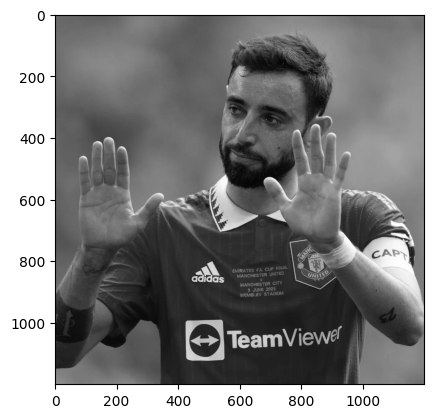

In [23]:
plt.imshow(bimodal_image,cmap='gray')

Plot histogram


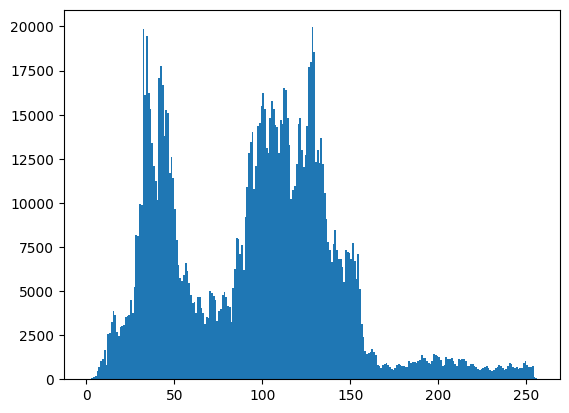

In [24]:
plt.hist(bimodal_image.ravel(),maximum_value,[minimum_value,maximum_value]); plt.show()

`blockSize = 5
C= 2.5`

Here, `blocksize` is the size of the window while `C` is a constant that is subtracted from the mean.
To know about these parameter [click](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3)


In [25]:
block_size = 5 # image window
C          = 2.5

In [26]:
a_thres_mean    =   cv2.adaptiveThreshold(bimodal_image, maximum_value, cv2.ADAPTIVE_THRESH_MEAN_C,     cv2.THRESH_BINARY,  block_size,C)
a_thres_gauss   =   cv2.adaptiveThreshold(bimodal_image, maximum_value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size,C)


In [27]:
bimodal_image[0:5, 0:5] 

array([[105, 105, 105, 105, 105],
       [105, 105, 105, 105, 105],
       [106, 105, 105, 105, 105],
       [107, 105, 105, 105, 105],
       [110, 105, 105, 105, 105]], dtype=uint8)

In [28]:
np.mean(bimodal_image[1:5, 1:5])

105.0

In [29]:
a_thres_mean[0:5, 0:5]

array([[255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255]], dtype=uint8)

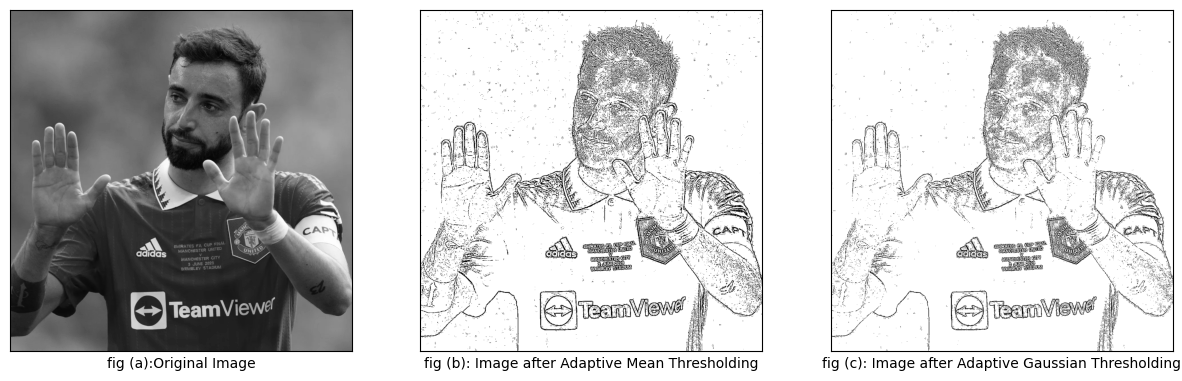

In [30]:
titles = ['fig (a):Original Image',
            'fig (b): Image after Adaptive Mean Thresholding', 'fig (c): Image after Adaptive Gaussian Thresholding']
images = [bimodal_image, a_thres_mean, a_thres_gauss]
plt.figure(figsize=(15,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray')
    plt.xlabel(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Adaptive Thresholding another example


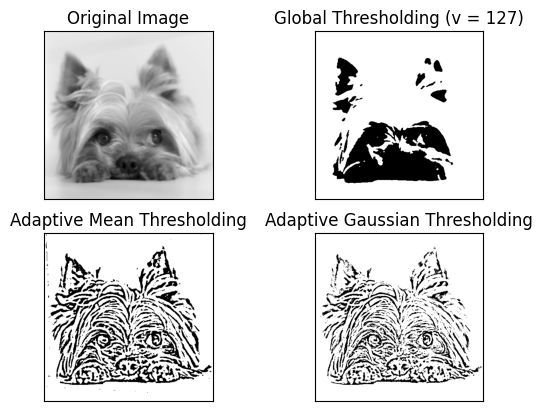

In [31]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#Loading the grayscale image
img = cv.imread('image.jpg', cv.IMREAD_GRAYSCALE)

assert img is not None, "file could not be read, check with os.path.exists()"

img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

### What if Histogram is not Bimodal?

- We can define multiple thresholds. 
- Sometimes we cannot apply threshold if it is not bimodal or trimodal.



## Key Take Aways


* Image thresholding is a simple type of Image segmentation.

- Black pixels match the background, and white pixels match the foreground (or vice versa) for the given value of threshold $T.$


$$
f(i,j)= \begin{cases}
    white,& \text{if } f(i,j)\geq T\\
    black,              & \text{otherwise}
\end{cases}
$$

- Different Images may have different lighting conditions in all situations using global thresholding may not be healthy. If this is a case, use adaptive thresholding.

- Binarization won't be correct for pictures that are not bimodal.

- If you consider an Image with Bimodal Histogram- a histogram with two peaks, you can approximately choose the middle of the intersection of two peaks. OTSU automatically identifies that value for binarization.
